Hierarchical clustering is an algorithm that groups similar objects together, and, as a result, produces a hierarchy of clusters. Clusters can be agglomerative or divisive. Agglomerative clustering is a bottom-up approach whereby data points start from their own clusters and then data merge together as one goes up the hierarchy. Conversely, divisive clustering is a top-down approach in which data points start off together and then split as one goes down the hierarchy. 

### Example 1

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

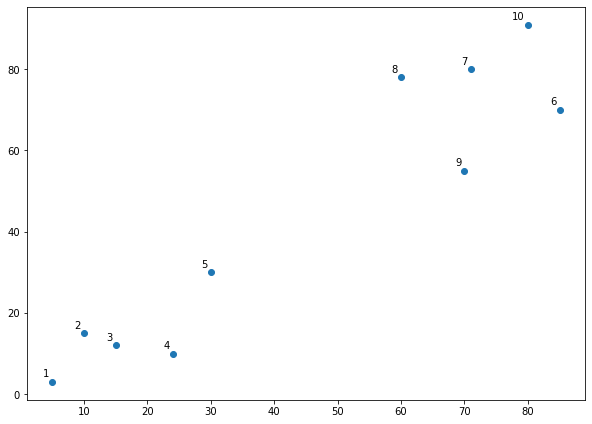

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

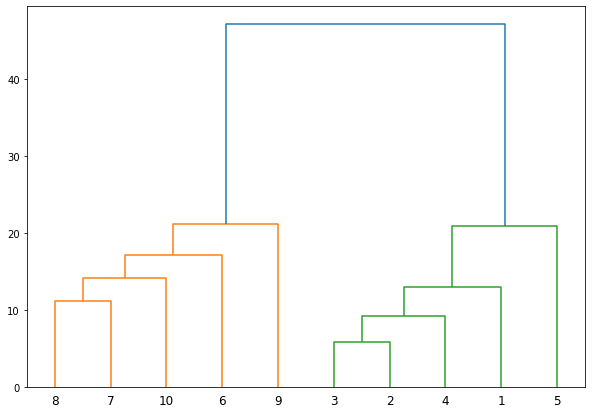

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [5]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

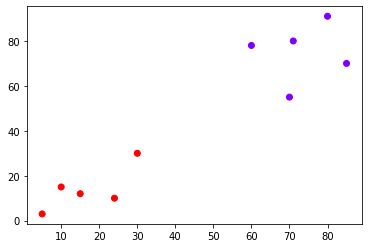

In [7]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

### Example 2

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [9]:
customer_data = pd.read_csv('data_hierarchical_clustering.csv')
#customer_data.shape
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data = customer_data.iloc[:, 3:5].values
#data.head()

Before we start our clustering, we need to determine the number of clusters to use. To determine the number of clusters, we need to draw a dendrogram.

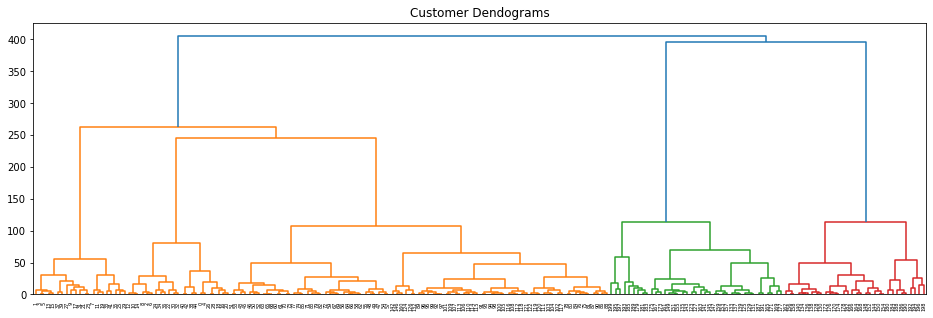

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16, 5))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Based on the dendrogram, we can use 5 clusters in the clustering algorithm. In the next step,. We use agglomerative clustering (as opposed to divisive) since it is the most commonly used.

N.B: Affinity (see in code below) refers to the metric used to compute the linkage. The linkage criterion determines the distance to be used between sets of observations. The default (and most commonly used) affinity is ""euclidian" while the default linkage criterion is "ward" which minimizes the variance of the clusters being merged.

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

We can now visualize the 5 clusters.

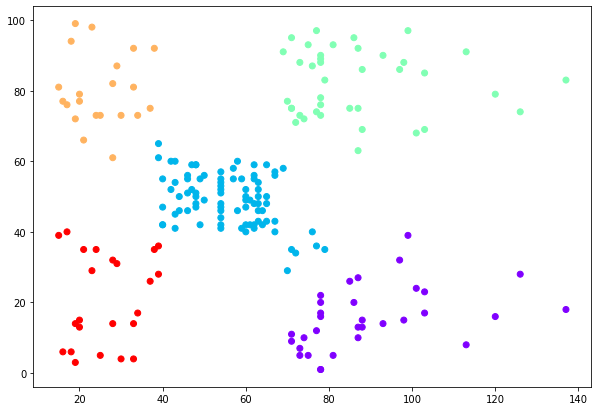

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Useful resources:
- https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
- https://www.statisticshowto.com/agglomerative-clustering/
- https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8